In [189]:
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [195]:
train = pd.read_csv("train.csv",index_col='id')
test = pd.read_csv("test.csv",index_col='id')

In [196]:
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [197]:
test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
0,A,B,A,C,B,D,A,E,E,G,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
5,A,B,A,C,B,D,A,E,C,L,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
15,A,B,A,C,B,D,A,E,C,F,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
16,A,A,B,A,B,D,A,E,E,F,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
17,A,B,A,A,B,B,A,E,E,I,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [198]:
X = train.copy()

In [199]:
#seperating target and dropping it from the train df
y = X.target
X = X.drop("target",axis=1)

In [200]:
#splitting data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [201]:
#getting objective column names
obj_cols = list(X.select_dtypes("object").columns)

In [202]:
#getting continous column names
cont_cols = list(X.select_dtypes("float64").columns)

Skewness: -0.201265


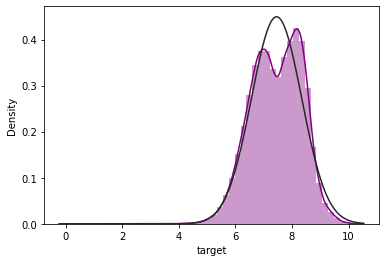

In [203]:
#checking the distribution of continous variables and target
from scipy.stats import norm, skew

print("Skewness: %f" % y.skew())
sns.distplot(y_train, color= 'purple',fit=norm);
plt.show()

Skewness is close to zero and the distribution seems to be normal. We are going to plot the boxplot for better view at outliers

<AxesSubplot:xlabel='target'>

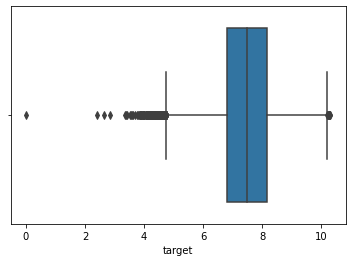

In [146]:
sns.boxplot(y)

In [204]:
#checking for outliers
for data in [y_train,y_valid]:
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    name =[z for z in globals() if globals()[z] is data][0]
    print("Identified %d outliers in %s set" % (len(outliers),name))

Identified 281 outliers in y_train set
Identified 79 outliers in y_valid set


In [205]:
for data in [y_train,y_valid]:
    percent = len(outliers)/len(y)*100
    name =[z for z in globals() if globals()[z] is data][0]
    print('Percent of outliers in whole %s set: %.2f' % (name,percent))

Percent of outliers in whole y_train set: 0.03
Percent of outliers in whole y_valid set: 0.03


The outliers do not stand even 1% of the whole set so we can just remove them

In [206]:
X_train = X_train[(y_train>=lower) & (y_train<=upper)]
X_valid = X_valid[(y_valid>=lower) & (y_valid<=upper)]

y_train = y_train[(y_train>=lower) & (y_train<=upper)]
y_valid = y_valid[(y_valid>=lower) & (y_valid<=upper)]

Same thing goes to the rest of continous columns

In [207]:
for data in [X_train,X_valid]:
    for col in cont_cols:
        q25, q75 = percentile(data[col], 25), percentile(data[col], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        outliers = [x for x in data[col] if x < lower or x > upper]
        name =[z for z in globals() if globals()[z] is data][0]
        if len(outliers) > 0:
            percent = len(outliers)/len(data[col])*100
            print("Column " + col + " in %s set contains %d outliers which is %.2f percent of total set" % (name,len(outliers),percent))

Column cont0 in X_train set contains 11 outliers which is 0.00 percent of total set
Column cont2 in X_train set contains 7067 outliers which is 2.95 percent of total set
Column cont6 in X_train set contains 1164 outliers which is 0.49 percent of total set
Column cont8 in X_train set contains 17358 outliers which is 7.24 percent of total set
Column cont0 in X_valid set contains 5 outliers which is 0.01 percent of total set
Column cont2 in X_valid set contains 1705 outliers which is 2.85 percent of total set
Column cont6 in X_valid set contains 251 outliers which is 0.42 percent of total set
Column cont8 in X_valid set contains 5172 outliers which is 8.63 percent of total set


Columns cont0 and cont6 are less than 1% of the total number of observations so we might remove them but for cont2 and cont8 we will try to do a log-transformation

In [208]:
#Log transformation for cont2 and outliers
for data in [X_train,X_valid]:
    q25, q75 = percentile(np.log(data.cont2), 25), percentile(np.log(data.cont2), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    name =[z for z in globals() if globals()[z] is data][0]
    outliers = [x for x in np.log(data.cont2) if x < lower or x > upper]
    print('Identified %d outliers in %s set' % (len(outliers),name))

Identified 0 outliers in X_train set
Identified 0 outliers in X_valid set


In [209]:
#Log(1+x) transformation for cont8 and outliers
for data in [X_train,X_valid]:
    q25, q75 = percentile(np.log1p(data.cont8), 25), percentile(np.log1p(data.cont8), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    name =[z for z in globals() if globals()[z] is data][0]
    outliers = [x for x in np.log1p(data.cont8) if x < lower or x > upper]
    percent = len(outliers)/len(data.cont8)*100
    print('Identified %d outliers in %s set which is %.2f percent' % (len(outliers),name,percent))

Identified 758 outliers in X_train set which is 0.32 percent
Identified 431 outliers in X_valid set which is 0.72 percent


We got rid off outliers in cont2 column and reduced number of outliers in cont8 thanks to log(1+x) transformation and now it's less than 1% so we might remove those aswell

In [210]:
X_train.cont2 = np.log(X_train.cont2)
X_valid.cont2 = np.log(X_valid.cont2)

X_train.cont8 = np.log1p(X_train.cont8)
X_valid.cont8 = np.log1p(X_valid.cont8)

In [211]:
for data in [X_train, X_valid]:
    for col in cont_cols:
        q25, q75 = percentile(data[col], 25), percentile(data[col], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        outliers = [x for x in data[col] if x < lower or x > upper]
        name =[z for z in globals() if globals()[z] is data][0]
        if len(outliers) > 0:
            data[col] = data[col][(data[col] >= lower) & (data[col] <=upper)]
            print("Column " + col + " removed %d observations from %s set" % (len(outliers),name))

Column cont0 removed 11 observations from X_train set
Column cont6 removed 1164 observations from X_train set
Column cont8 removed 758 observations from X_train set
Column cont0 removed 5 observations from X_valid set
Column cont6 removed 251 observations from X_valid set
Column cont8 removed 431 observations from X_valid set


Now let's take care of objective columns

In [212]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X[col].nunique(), obj_cols))
d = dict(zip(obj_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('cat0', 2),
 ('cat1', 2),
 ('cat2', 2),
 ('cat3', 4),
 ('cat4', 4),
 ('cat5', 4),
 ('cat8', 7),
 ('cat6', 8),
 ('cat7', 8),
 ('cat9', 15)]

In [213]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

Cat9 has high cardinality number so for this column we are going to proceder a LabelEncoder, while for the rest OneHotEncoding

In [214]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [215]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

#Label encoding for high cardinality
LE_cols_train = pd.DataFrame(labelencoder.fit_transform(X_train[high_cardinality_cols]))
LE_cols_valid = pd.DataFrame(labelencoder.transform(X_valid[high_cardinality_cols]))

#Getting back the index
LE_cols_train.index = X_train.index
LE_cols_valid.index = X_valid.index

#Assigning it to OHE_X_train
OH_X_train_LE = pd.concat([OH_X_train,LE_cols_train],axis=1)
OH_X_valid_LE = pd.concat([OH_X_valid,LE_cols_valid],axis=1)

In [216]:
OH_X_train.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,31,32,33,34,35,36,37,38,39,40
id,,,,,,,,,,,,,,,,,,,,,
257386,0.974950,0.090462,-1.239687,0.817951,0.744013,0.480623,0.476957,0.481133,0.507111,0.813633,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
495461,0.765189,0.485317,-0.618471,0.188797,0.279260,0.706012,0.417562,0.289968,0.282268,0.650711,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
320,0.492269,0.552775,-1.411244,0.312260,0.280182,0.462598,0.686144,0.926109,0.391435,0.521221,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
74032,0.452170,0.697628,-0.758855,0.198145,0.413833,0.364342,0.450794,0.362061,0.270761,0.386660,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
263581,0.671879,0.094491,-0.904907,0.738665,0.483451,0.833862,0.444219,0.680300,0.175181,0.815636,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [217]:
OH_X_train_LE.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,32,33,34,35,36,37,38,39,40,0
id,,,,,,,,,,,,,,,,,,,,,
257386,0.974950,0.090462,-1.239687,0.817951,0.744013,0.480623,0.476957,0.481133,0.507111,0.813633,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11
495461,0.765189,0.485317,-0.618471,0.188797,0.279260,0.706012,0.417562,0.289968,0.282268,0.650711,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
320,0.492269,0.552775,-1.411244,0.312260,0.280182,0.462598,0.686144,0.926109,0.391435,0.521221,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10
74032,0.452170,0.697628,-0.758855,0.198145,0.413833,0.364342,0.450794,0.362061,0.270761,0.386660,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11
263581,0.671879,0.094491,-0.904907,0.738665,0.483451,0.833862,0.444219,0.680300,0.175181,0.815636,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5


# TO DO:
1. GridSearchCV() with few regressors (random forest, linear, SVR, XGBOOST) to check which performs the best in RMSE
2. Compare OH_X_train and OH_X_train_LE as training sets
3. Do the same feature engineering for TEST SET
4. Select the best model and make predictions with submission